# <center> Doing some Linear Regressions

We will play with a linear regression

### Simple Linear Regression
---

Data is about the **weight of the brain** given the **head size**. 

The data is used in the paper *A Study of the Relations of the Brain to the Size of the Head*, referenced at the bottom of the notebook and contains columns for 

* brain weight (grams)
* head size (cm^3)
* gender: 1=male; 2=female
* age range: 1=20-46, 2=46+

Each point is for a human adult.

### Multiple Regression
---

#### Imports and settings

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

%matplotlib inline

data_folder = 'datasets/'

# Two files as we will do both the simple (first) and multiple (second) linear regression
filename_head = data_folder + 'head_size_brain_weight.csv'
filename_breakfast = data_folder + 'healthy_breakfast.csv'

## Simple Linear Regression

### Read and analyse dataset

#### Read the head dataset, head and describe it

In [7]:
df = pd.read_csv(filename_head)

In [6]:
df.head()

,Gender,Age_range,Head_size,Brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
df.describe()

,Gender,Age_range,Head_size,Brain_weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1173b2710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117552310>]], dtype=object)

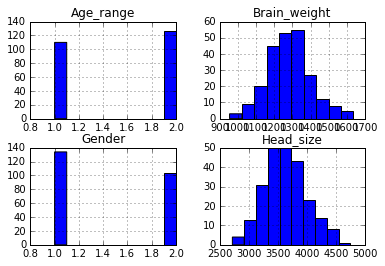

In [9]:
df.hist()

#### Isolate x and y

In [29]:
x = df['Head_size']
y = df['Brain_weight']

#### Plot y vs. x

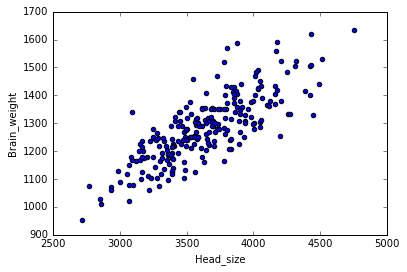

In [30]:
df.plot('Head_size', 'Brain_weight', kind='scatter')

#### Technical note: the LinearRegression class needs data to be reshaped in input

In [32]:
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


### Train regressor

#### Initialise model

In [33]:
model = LinearRegression()

#### Train model

In [34]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Plot the resulting line and print fitted parameters

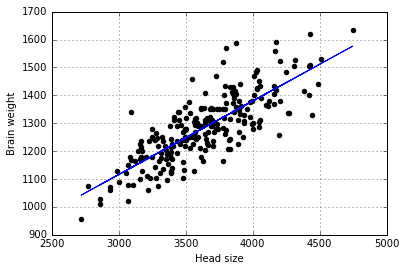

Slope of the fit:  [[ 0.26342934]]
Intercept of the fit:  [ 325.57342105]


In [42]:
# Plot the data and the fitting line
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='blue')
plt.grid()
plt.xlabel('Head size')
plt.ylabel('Brain weight')
plt.show()

# Display the fitted slope and intercept of the fitting line
print 'Slope of the fit: ', model.coef_
print 'Intercept of the fit: ', model.intercept_

#### Predict on a new x!

In [43]:
new_x = 4200

model.predict(new_x)

array([[ 1431.9766469]])

### Performance 

In [39]:
# Separate train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Shape of the test dataset

In [45]:
x_test.shape

(48, 1)

In [54]:
# Re-instantiate model, fit on train, predict on test, see performance

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(y_test)

In [56]:
print model.score(x_test, y_test)

0.562099143352


> TODO: any difference if we select the gender beforehand?

## References

### Simple Regression
---

* [The head dataset can be found here](http://www.stat.ufl.edu/~winner/datasets.html)
* [The original paper of the head dataset](http://www.jstor.org/stable/2331533?seq=1#page_scan_tab_contents)

### Multiple Regression
---